In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation
from keras import optimizers

Using TensorFlow backend.


In [2]:
import keras_radam


In [2]:
 pip install keras-rectified-adam

Note: you may need to restart the kernel to use updated packages.


In [3]:
import keras_radam

In [4]:
from helper import get_class_names, get_train_data, get_test_data, plot_images, plot_model

In [5]:
matplotlib.style.use('ggplot')

In [6]:
class_names = get_class_names()
print(class_names)

Decoding file: data/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [7]:
num_classes = len(class_names)
print(num_classes)

10


In [8]:
IMAGE_SIZE = 32
CHANNELS = 3

In [9]:
images_train, labels_train, class_train = get_train_data()

Decoding file: data/data_batch_1
Decoding file: data/data_batch_2
Decoding file: data/data_batch_3
Decoding file: data/data_batch_4
Decoding file: data/data_batch_5


In [10]:
images_test, labels_test, class_test = get_test_data()

Decoding file: data/test_batch


In [11]:
print("Training set size:\t",len(images_train))
print("Testing set size:\t",len(images_test))

Training set size:	 50000
Testing set size:	 10000


In [12]:
def cnn_model():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE,IMAGE_SIZE,CHANNELS)))    
    model.add(Conv2D(32, (3, 3), activation='relu'))    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='softmax'))
    
    model.summary()
    
    return model

In [13]:
modelradam = cnn_model()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
________________________________________________

In [14]:
checkpoint = ModelCheckpoint('best_model_simple.h5',  
                             monitor='val_loss', 
                             verbose=0, 
                             save_best_only= True, 
                                mode='auto') 

In [15]:
opt = RAdam(total_steps=5000, warmup_proportion=0.1, min_lr=1e-5)

NameError: name 'RAdam' is not defined

In [16]:
from keras_radam import RAdam

In [17]:
opt = RAdam(total_steps=5000, warmup_proportion=0.1, min_lr=1e-5)

In [18]:
modelradam.compile(loss='categorical_crossentropy', 
              optimizer=opt, # RAdam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) 

In [19]:
modelradam_details = modelradam.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 50, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 215s 4ms/step - loss: 2.0529 - accuracy: 0.2296 - val_loss: 1.6074 - val_accuracy: 0.4250
Epoch 2/50
50000/50000 [==============================] - 193s 4ms/step - loss: 1.4676 - accuracy: 0.4666 - val_loss: 1.2263 - val_accuracy: 0.5603
Epoch 3/50
50000/50000 [==============================] - 191s 4ms/step - loss: 1.2221 - accuracy: 0.5674 - val_loss: 1.0738 - val_accuracy: 0.6218
Epoch 4/50
50000/50000 [==============================] - 195s 4ms/step - loss: 1.0627 - accuracy: 0.6242 - val_loss: 0.9457 - val_accuracy: 0.6699
Epoch 5/50
50000/50000 [==============================] - 206s 4ms/step - loss: 0.9454 - accuracy: 0.6662 - val_loss: 0.8893 - val_accuracy: 0.6902
Epoch 6/50
50000/50000 [==============================] - 203s 4ms/step - loss: 0.8578 - accuracy: 0.7014 - val_loss: 0.8092 - val_accuracy: 0.7172
Epoch 7/50
500

In [20]:
modeladam = cnn_model()
modeladam.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=1.0e-4), # Adam optimizer with 1.0e-4 learning rate
              metrics = ['accuracy']) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [21]:
modeladam_details = modeladam.fit(images_train, class_train,
                    batch_size = 128, # number of samples per gradient update
                    epochs = 50, # number of iterations
                    validation_data= (images_test, class_test),
                    callbacks=[checkpoint],
                    verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 180s 4ms/step - loss: 1.8849 - accuracy: 0.3079 - val_loss: 1.6115 - val_accuracy: 0.4185
Epoch 2/50
50000/50000 [==============================] - 186s 4ms/step - loss: 1.5912 - accuracy: 0.4206 - val_loss: 1.4882 - val_accuracy: 0.4635
Epoch 3/50
50000/50000 [==============================] - 172s 3ms/step - loss: 1.4693 - accuracy: 0.4651 - val_loss: 1.3651 - val_accuracy: 0.5042
Epoch 4/50
50000/50000 [==============================] - 172s 3ms/step - loss: 1.3849 - accuracy: 0.5020 - val_loss: 1.2808 - val_accuracy: 0.5427
Epoch 5/50
50000/50000 [==============================] - 170s 3ms/step - loss: 1.3236 - accuracy: 0.5244 - val_loss: 1.2679 - val_accuracy: 0.5478
Epoch 6/50
50000/50000 [==============================] - 171s 3ms/step - loss: 1.2747 - accuracy: 0.5455 - val_loss: 1.1848 - val_accuracy: 0.5821
Epoch 7/50
50000/50000 [==============================] - 170s

Text(0.5, 1.0, 'training Loss curves')

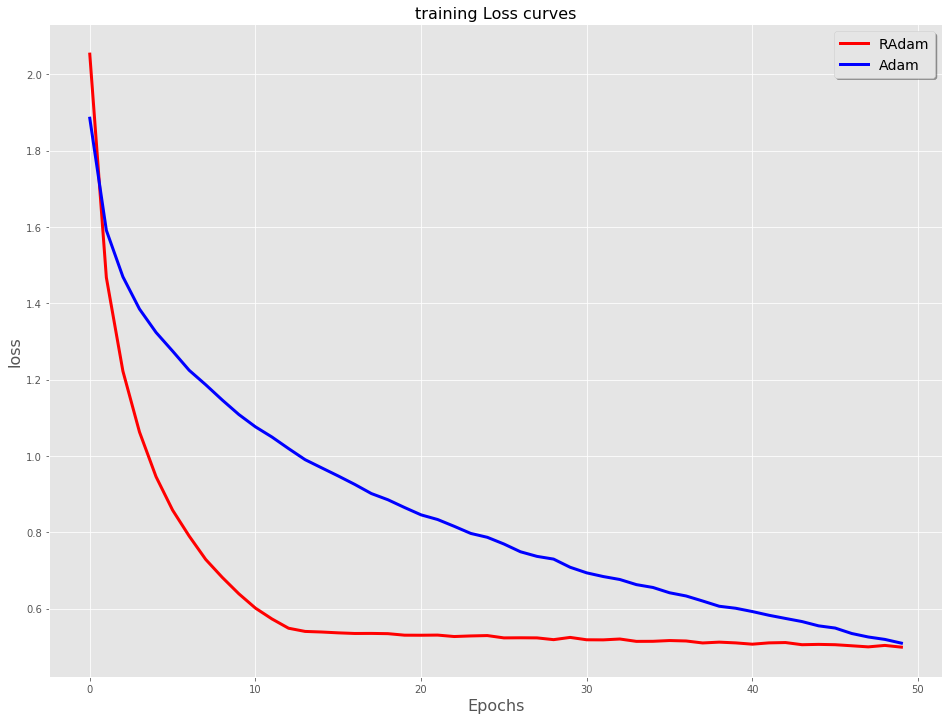

In [23]:
plt.figure(figsize= [16,12])
plt.plot(modelradam_details.history['loss'],'red',linewidth=3.0)
plt.plot(modeladam_details.history['loss'],'blue',linewidth=3.0)
plt.legend(('RAdam', 'Adam'), fontsize=14, shadow=True)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('training Loss curves', fontsize=16)

Text(0.5, 1.0, 'validation Loss curves')

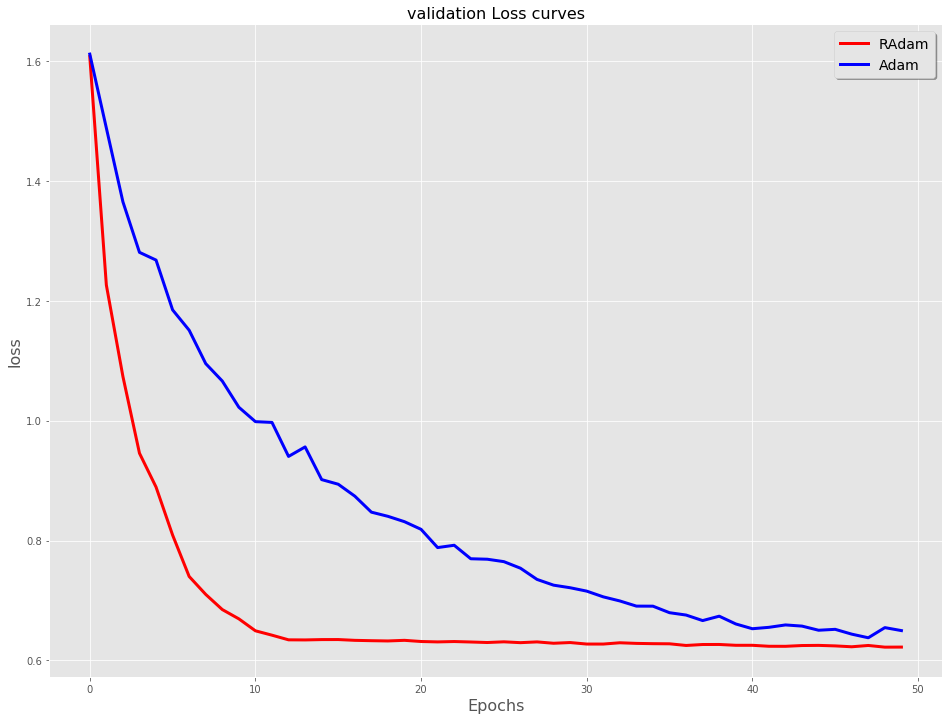

In [24]:
plt.figure(figsize= [16,12])
plt.plot(modelradam_details.history['val_loss'],'red',linewidth=3.0)
plt.plot(modeladam_details.history['val_loss'],'blue',linewidth=3.0)
plt.legend(('RAdam', 'Adam'), fontsize=14, shadow=True)
plt.xlabel('Epochs',fontsize=16)
plt.ylabel('loss',fontsize=16)
plt.title('validation Loss curves', fontsize=16)